# ゼロから作るDeepLearning 

第2章パーセプトロン p21からp28

# パーセプトロンとは

- ローゼンブラットというアメリカの研究者によって1957年に考案された
- ニューラルネットワーク(ディープラーニング)の起源となるアルゴリズム

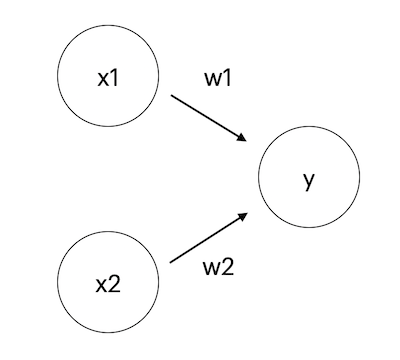

In [1]:
from IPython.display import Image
Image("./figure/パーセプトロン.png")

## 動作原理は、これだけ

yは出力信号、x1, x2は入力信号、w1, w2は重み、θは限界値(バイアス(b)と言ったりする)を表す。

$$
    y =
        \begin{cases}
            0 (w1x1 + w2x2　<=  θ) \\
             1 (w1x1 + w2x2  　>  θ) \\
        \end{cases}
$$

重み(w1, w2)が大きければ大きいほど、その重みに対応する信号の重要性が高くなる！

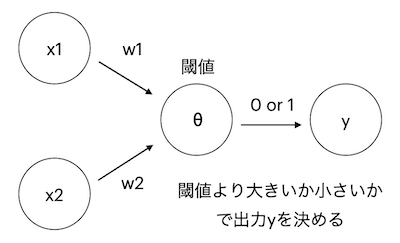

In [2]:
Image("./figure/閾値.png")

### ANDゲート

| x1 | x2 | y |
| :--- | :---: | ---: |
|   0   |   0   |   0   |
|   1 |   0   |   0     |
|   0 |   1   |   0     |
|   1 |    1   |    1    |

(w1, w2, θ) = (0.5, 0.5, 0.7)


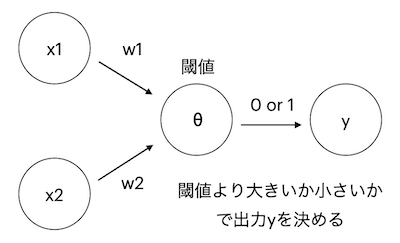

In [3]:
Image("./figure/閾値.png")

### NANDゲート

In [4]:
# ANDゲートの符号を全て反対するだけで実現できる。
# ANDゲートが(w1, w2, θ) = (0.5, 0.5, 0.7)だったので、
(w1, w2, θ) = (-0.5,- 0.5, -0.7)

| x1 | x2 | y |
| :--- | :---: | ---: |
|   0   |   0   |   1   |
|   1 |   0   |   1     |
|   0 |   1   |   1    |
|   1 |    1   |    0    |

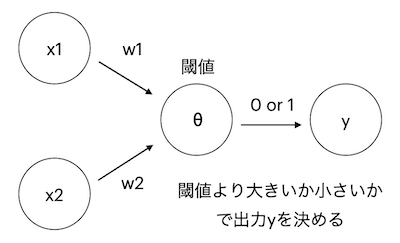

In [5]:
Image("./figure/閾値.png")

### ORゲート

In [6]:
# ANDゲートで設定したθを調整することで実現できる。
# ANDゲートが(w1, w2, θ) = (0.5, 0.5, 0.7)だったので、
(w1, w2, θ) = (0.5, 0.5, 0.2)

| x1 | x2 | y |
| :--- | :---: | ---: |
|   0   |   0   |   0   |
|   1 |   0   |   1     |
|   0 |   1   |   1     |
|   1 |    1   |    1    |

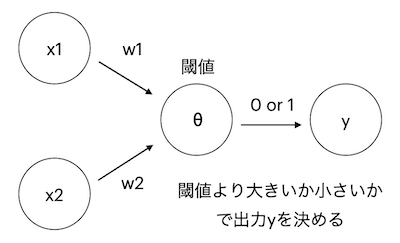

In [7]:
Image("./figure/閾値.png")

# パーセプトロンの実装

In [8]:
def AND (x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [9]:
AND(0, 0)

0

In [10]:
AND(1, 0)

0

In [11]:
AND(0, 1)

0

In [12]:
AND(1, 1)

1

# 重みとバイアスの導入

θを-bとしてパーセプトロンの動作を変更する。行っていることは、同じ

$$
    y =
        \begin{cases}
            0 (b + w1x1 + w2x2　<=  0) \\
             1 (b + w1x1 + w2x2  　>  0) \\
        \end{cases}
$$

In [13]:
import numpy as np
x = np.array([0, 1])
w = np.array([0.5, 0.5])
b = -0.7
w*x

array([0. , 0.5])

In [14]:
np.sum(w*x)

0.5

In [15]:
np.sum(w*x) + b

-0.19999999999999996

## ANDゲート

前の図では、(w1, w2, θ) = (0.5, 0.5, 0.7) 
となっていたところ、コードを書くときは、w1とw2を np.array([0.5, 0.5])　としていて、θは b= -0.7になっている(左辺に持ってきたので符号は逆転)。

In [16]:
import numpy as np
def AND (x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [17]:
AND(0, 0)

0

In [18]:
AND(0, 1)

0

In [19]:
AND(1, 0)

0

In [20]:
AND(1, 1)

1

| x1 | x2 | y |
| :--- | :---: | ---: |
|   0   |   0   |   0   |
|   1 |   0   |   0     |
|   0 |   1   |   0     |
|   1 |    1   |    1    |

# NANDゲート

In [21]:
import numpy as np
def NAND (x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

重みとバイアスだけがANDと違う。
w = np.array([0.5, 0.5])が、w = np.array([-0.5, -0.5])になっている。 bが、-0.7から0.7になっている。

In [31]:
NAND(0, 0)

1

In [23]:
NAND(0, 1)

1

In [24]:
NAND(1, 0)

1

In [32]:
NAND(1, 1)

0

| x1 | x2 | y |
| :--- | :---: | ---: |
|   0   |   0   |   1   |
|   1 |   0   |   1     |
|   0 |   1   |   1    |
|   1 |    1   |    0    |

# ORゲート

In [26]:
import numpy as np
def OR (x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

バイアス(θ)だけがANDと違う。b = -0.2になっている。

In [33]:
OR(0, 0)

0

In [28]:
OR(0, 1)

1

In [29]:
OR(1, 0)

1

In [34]:
OR(1, 1)

1

| x1 | x2 | y |
| :--- | :---: | ---: |
|   0   |   0   |   0   |
|   1 |   0   |   1     |
|   0 |   1   |   1     |
|   1 |    1   |    1    |

# 本日分は終了です。